### The `alpha` parameter in `geom_imshow()`


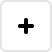
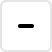
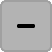
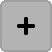
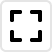
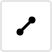
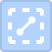
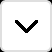
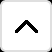
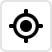

In [1]:
import numpy as np
from lets_plot import *

LetsPlot.setup_html()

In [2]:
# Load an image

from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://github.com/JetBrains/lets-plot-docs/raw/master/source/examples/cookbook/images/fisher_boat.png')

image = Image.open(BytesIO(response.content))
im_arr = np.asarray(image)
im_arr.shape


(225, 225, 3)

In [3]:
p = ggplot() + geom_point(x=112, y=112, color="black", size=100, shape=15) + ggsize(450, 450)
p + ggtitle("The background black square") + ggsize(400, 300)

#### 1. `alpha` parameter and color image


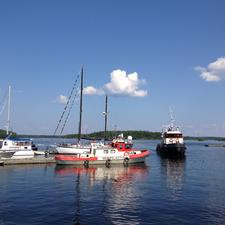
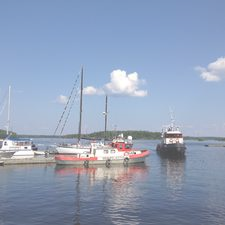

In [4]:
pair1 = GGBunch()
pair1.add_plot(p + geom_imshow(im_arr) + ggtitle("no alpha (opaque image)"), 0, 0)
pair1.add_plot(p + geom_imshow(im_arr, alpha=0.7) + ggtitle("alpha=0.7"), 500, 0)
pair1

#### 2. `alpha` parameter and grayscale image

In [5]:
im_arr_gs = im_arr[:,:,0]
im_arr_gs.shape

(225, 225)


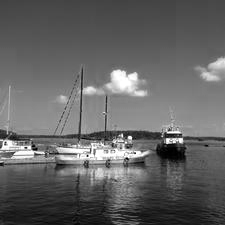
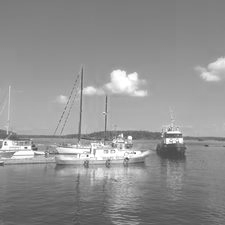

In [6]:
pair2 = GGBunch()
pair2.add_plot(p + geom_imshow(im_arr_gs) + ggtitle("no alpha (opaque image)"), 0, 0)
pair2.add_plot(p + geom_imshow(im_arr_gs, alpha=0.7) + ggtitle("alpha=0.7"), 500, 0)
pair2

#### 3. `alpha` parameter and pseudo-color image


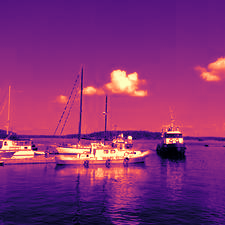
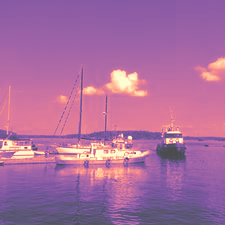

In [7]:
pair3 = GGBunch()
pair3.add_plot(p + geom_imshow(im_arr_gs, "magma") + ggtitle("no alpha (opaque image)"), 0, 0)
pair3.add_plot(p + geom_imshow(im_arr_gs, "magma", alpha=0.7) + ggtitle("alpha=0.7"), 500, 0)
pair3

#### 4. `alpha` parameter and grayscale image with transparent pixels (`NaN` values)

In [8]:
im_arr_gs_nan=im_arr_gs.copy()
im_arr_gs_nan=im_arr_gs_nan.astype(np.float64)
im_arr_gs_nan[im_arr_gs_nan < 80] = np.nan


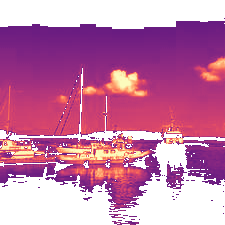
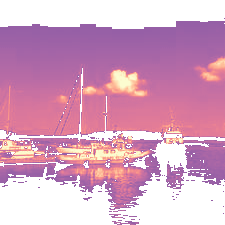

In [9]:
pair4 = GGBunch()
pair4.add_plot(p + geom_imshow(im_arr_gs_nan, "magma", norm=False) + ggtitle("no alpha (opaque image)"), 0, 0)
pair4.add_plot(p + geom_imshow(im_arr_gs_nan, "magma", norm=False, alpha=0.7) + ggtitle("alpha=0.7"), 500, 0)
pair4